In [1]:
%config IPCompleter.greedy=True

# Wybór metody oversamplingu

## Pobranie danych z pliku

In [2]:
import numpy as np

file_name = "creditcard.csv"
file = open(file_name)
file.readline()  # skip the header
data = np.loadtxt(file, delimiter=',')

## Wydzielenie zbiorów

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data[:, :30], data[:, 30:], random_state=0)
Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)

## Inicjacja struktur danych do testów


In [4]:
scores_false_negative = []
scores_false_positive = []
methods = []

## Wybór metody

### Bez resamplingu

In [5]:
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

pipeline = make_pipeline(StandardScaler(), MLPClassifier())
pipeline.fit(X_train, Y_train)
cm = confusion_matrix(Y_test, pipeline.predict(X_test))
print(cm)
scores_false_negative.append(cm[1,0])
scores_false_positive.append(cm[0,1])
methods.append("Brak")

Using TensorFlow backend.
c:\program files\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[71075     7]
 [   36    84]]


### Random oversampling - prawdopodobnie metoda nie jest zgodna z najnowszą wersją sklearn

In [6]:
# from imblearn.over_sampling import RandomOverSampler
# from sklearn.pipeline import make_pipeline
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import confusion_matrix

# X_train, Y_train = RandomOverSampler(random_state=0).fit_sample(tuple(X_train), y=Y_train.itemset())

# random_forest = make_pipeline(StandardScaler(), RandomForestClassifier())
# random_forest.fit(X_train, Y_train)
# cm = confusion_matrix(Y_test, random_forest.predict(X_test))
# scores_false_negative.append(cm[1,0])
# scores_false_positive.append(cm[0,1])
# methods.append("Random OverSampling")
# NIE DZIALA

# SMOTE

In [7]:
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

X_train_curr, Y_train_curr = SMOTE().fit_resample(X_train, Y_train)

pipeline = make_pipeline(StandardScaler(), MLPClassifier())
pipeline.fit(X_train_curr, Y_train_curr)
cm = confusion_matrix(Y_test, pipeline.predict(X_test))
print(cm)
scores_false_negative.append(cm[1,0])
scores_false_positive.append(cm[0,1])
methods.append("SMOTE")

c:\program files\python36\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[71051    31]
 [   20   100]]


## ADASYN

In [8]:
from imblearn.over_sampling import ADASYN
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

X_train_curr, Y_train_curr = ADASYN().fit_resample(X_train, Y_train)

pipeline = make_pipeline(StandardScaler(), MLPClassifier())
pipeline.fit(X_train_curr, Y_train_curr)
cm = confusion_matrix(Y_test, pipeline.predict(X_test))
print(cm)
scores_false_negative.append(cm[1,0])
scores_false_positive.append(cm[0,1])
methods.append("ADASYN")

c:\program files\python36\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[71048    34]
 [   21    99]]


## Smote + Tomek

In [9]:
from imblearn.combine import SMOTETomek
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

X_train_curr, Y_train_curr = SMOTETomek().fit_resample(X_train, Y_train)

pipeline = make_pipeline(StandardScaler(), MLPClassifier())
pipeline.fit(X_train_curr, Y_train_curr)
cm = confusion_matrix(Y_test, pipeline.predict(X_test))
print(cm)
scores_false_negative.append(cm[1,0])
scores_false_positive.append(cm[0,1])
methods.append("Smote + Tomek")

c:\program files\python36\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[71058    24]
 [   23    97]]


## Wyniki - false negative

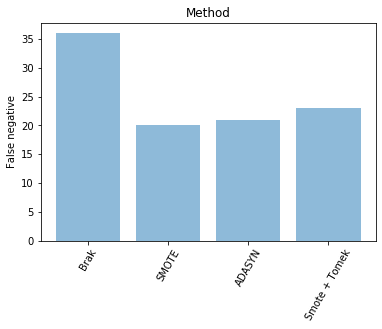

In [10]:
import matplotlib.pyplot as plt

plt.bar(np.arange(len(methods)), scores_false_negative, align='center', alpha=0.5)
plt.xticks(np.arange(len(methods)), methods, rotation = 60)
plt.ylabel('False negative')
plt.title('Method')

plt.show()

## Wyniki - false positive

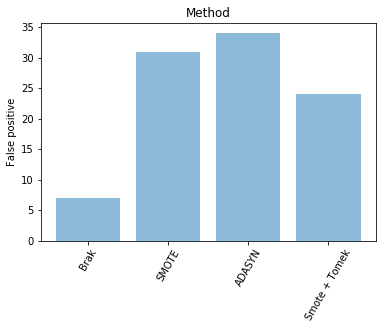

In [11]:
import matplotlib.pyplot as plt

plt.bar(np.arange(len(methods)), scores_false_positive, align='center', alpha=0.5)
plt.xticks(np.arange(len(methods)), methods, rotation = 60)
plt.ylabel('False positive')
plt.title('Method')

plt.show()

## Wnioski

Ze względu na najlepsze rezultaty wybrano metode **SMOTE**. Niestety nie udało się uruchomić losowego Oversamplingu, ponieważ jest to metoda prostego powtarzania wyników, rezultat mógłby być znacznie lepszy